In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

In [146]:
data=pd.read_excel('Data_Train.xlsx')
data.head(15)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [147]:
data.describe(include='all')

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690,12690.000000,12690,12690,12578,12592,12688,11486,12690.000000
unique,113,NaN,4155,2689,359,1416,32,1847,NaN
top,QUICK BITES,NaN,South Indian,11am – 11pm (Mon-Sun),Chennai,Gachibowli,3.9,44 votes,NaN
freq,4218,NaN,532,1415,2174,166,1238,71,NaN
mean,NaN,7759.134121,NaN,NaN,NaN,NaN,NaN,NaN,655.252246
std,NaN,4504.874150,NaN,NaN,NaN,NaN,NaN,NaN,627.003540
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
25%,NaN,3863.250000,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
50%,NaN,7740.000000,NaN,NaN,NaN,NaN,NaN,NaN,500.000000
75%,NaN,11688.750000,NaN,NaN,NaN,NaN,NaN,NaN,800.000000


In [148]:
data[data['RATING']=='-']['COST']

13       400
85       300
156      400
178      400
235       50
        ... 
12584    300
12585    400
12591    150
12641    300
12646    300
Name: COST, Length: 495, dtype: int64

In [149]:
data['RATING'][data['RATING']=='NEW']='-1'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
data['RATING'][data['RATING']=='-']='-1'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
data['RATING']=[float(i) for i in data['RATING']]

In [152]:
data['RATING'].fillna(-1,inplace=True)

In [153]:
data['VOTES'].fillna('00 votes',inplace=True)

In [154]:
data['VOTES'] = data['VOTES'].str.split(' ').str[0]

In [155]:
data['VOTES']=[float(i) for i in data['VOTES']]

In [156]:
data['TITLE'].value_counts()[0:20]

QUICK BITES               4218
CASUAL DINING             3652
None                      1003
CAFÉ                       607
DESSERT PARLOR             382
CASUAL DINING,BAR          349
FINE DINING                308
BAKERY                     302
BEVERAGE SHOP              156
BAR,CASUAL DINING          128
LOUNGE                      98
BAKERY,QUICK BITES          92
BAR                         91
FOOD COURT                  78
CASUAL DINING,CAFÉ          56
MESS                        53
KIOSK                       53
BAKERY,DESSERT PARLOR       51
PUB                         50
SWEET SHOP,QUICK BITES      48
Name: TITLE, dtype: int64

In [157]:
data[data['TITLE']=='QUICK BITES']['COST'].mean()

347.3027501185396

In [158]:
data[data['TITLE']=='CASUAL DINING']['COST'].mean()

770.8324205914568

In [159]:
data[data['TITLE']=='None']['COST'].mean()

415.55333998005983

In [160]:
data[data['TITLE']=='CAFÉ']['COST'].mean()

656.836902800659

In [161]:
data['QB']=[1 if i=='QUICK BITES' else 0 for i in data['TITLE']]
data['CD']=[1 if i=='CASUAL DINING' else 0 for i in data['TITLE']]
data['NN']=[1 if i=='None' else 0 for i in data['TITLE']]
data['CF']=[1 if i=='CAFÉ' else 0 for i in data['TITLE']]
data['CDB']=[1 if i=='CASUAL DINING,BAR' else 0 for i in data['TITLE']]
data['DP']=[1 if i=='DESSERT PARLOR' else 0 for i in data['TITLE']]
data['FD']=[1 if i=='FINE DINING ' else 0 for i in data['TITLE']]
data['BKR']=[1 if i=='BAKERY ' else 0 for i in data['TITLE']]
data['BS']=[1 if i=='BEVERAGE SHOP' else 0 for i in data['TITLE']]
data['BCD']=[1 if i=='BAR,CASUAL DINING' else 0 for i in data['TITLE']]

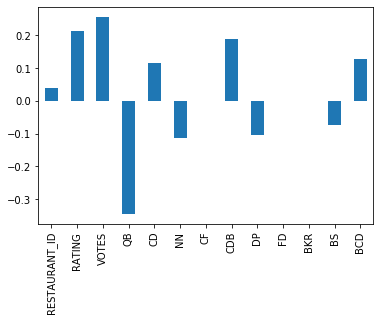

In [162]:
data.drop('COST',axis=1).corrwith(data['COST']).plot(kind='bar')
plt.show()

In [163]:
data['CUISINES'].fillna('South Indian',inplace=True)

In [164]:
import re
g=[]
for i in data['CUISINES']:
    a=re.split(', ',i)
    for k in a:
        g.append(k)

In [165]:
G=pd.Series(g)
G.value_counts()[0:10]

North Indian    5380
Chinese         4362
South Indian    2273
Fast Food       2120
Continental     1563
Biryani         1259
Italian         1144
Desserts        1140
Beverages        964
Cafe             830
dtype: int64

In [166]:
data['CUISINES'].value_counts()[0:20]

South Indian                           532
North Indian                           526
North Indian, Chinese                  501
Fast Food                              286
Chinese                                167
Bakery                                 148
Bakery, Desserts                       148
South Indian, North Indian, Chinese    139
Cafe                                   134
Kerala                                 131
Biryani                                129
Street Food                            121
Chinese, North Indian                  119
South Indian, North Indian             106
North Indian, Mughlai                  102
North Indian, Chinese, Biryani          91
Desserts                                87
Finger Food                             87
North Indian, South Indian, Chinese     87
Ice Cream, Desserts                     81
Name: CUISINES, dtype: int64

In [167]:
data['NI']=[1 if ('North Indian' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['CH']=[1 if ('Chinese' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['SI']=[1 if ('South Indian' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['FF']=[1 if ('Fast Food' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['CNT']=[1 if ('Continental' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['BRN']=[1 if ('Biryani' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['ITL']=[1 if ('Italian' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['DST']=[1 if ('Desserts' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['BVG']=[1 if ('Beverages' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['CFA']=[1 if ('Cafe' in re.split(', ',i))else 0 for i in data['CUISINES']]


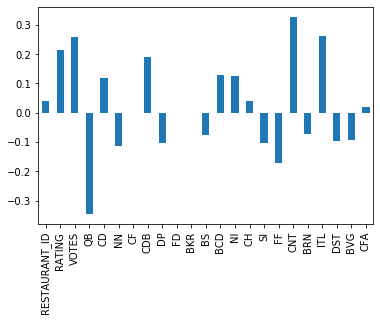

In [168]:
data.drop('COST',axis=1).corrwith(data['COST']).plot(kind='bar')
plt.show()

In [169]:
data['CITY'].value_counts()[0:20]

Chennai          2174
Bangalore        2149
Hyderabad        1819
Mumbai           1722
New Delhi        1321
Kochi            1279
Gurgaon           379
Secunderabad      310
Noida             211
Navi Mumbai       165
Ghaziabad         102
Thane              97
Faridabad          79
Bandra West        69
Thane West         52
Andheri West       48
Bengaluru          42
Greater Noida      31
India              23
Kakkanad           15
Name: CITY, dtype: int64

In [170]:
data[data['CITY']=='Mumbai']['COST'].mean()

865.2729384436701

In [171]:
data[data['CITY']=='Bandra West']['COST'].mean()

1275.3623188405797

In [172]:
data[data['CITY']=='Andheri West']['COST'].mean()

853.125

In [173]:
data[data['CITY']=='Navi Mumbai']['COST'].mean()

667.5757575757576

In [174]:
data[data['CITY']=='Chennai']['COST'].mean()

588.5878564857405

In [175]:
data['CITY_CHNNY']=[1 if i=='Chennai' else 0 for i in data['CITY']]
data['CITY_BNG']=[1 if i=='Bangalore' else 0 for i in data['CITY']]
data['CITY_HYBD']=[1 if i=='Hyderabad' else 0 for i in data['CITY']]
data['CITY_MUM']=[1 if i=='Mumbai' else 0 for i in data['CITY']]
data['CITY_NDL']=[1 if i=='New Delhi' else 0 for i in data['CITY']]
data['CITY_KCH']=[1 if i=='Kochi' else 0 for i in data['CITY']]
data['CITY_GRG']=[1 if i=='Gurgaon' else 0 for i in data['CITY']]
data['CITY_SCR']=[1 if i=='Secunderabad' else 0 for i in data['CITY']]
data['CITY_NOD']=[1 if i=='Noida' else 0 for i in data['CITY']]
data['CITY_NMUM']=[1 if i=='Navi Mumbai' else 0 for i in data['CITY']]
data['CITY_GZB']=[1 if i=='Ghaziabad' else 0 for i in data['CITY']]
data['CITY_THN']=[1 if i=='Thane' else 0 for i in data['CITY']]
data['CITY_FDB']=[1 if i=='Faridabad' else 0 for i in data['CITY']]
data['CITY_BWMUM']=[1 if i=='Bandra West' else 0 for i in data['CITY']]


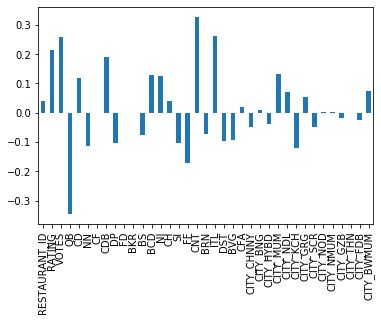

In [176]:
data.drop('COST',axis=1).corrwith(data['COST']).plot(kind='bar')
plt.show()

In [177]:
data['LOCALITY'].value_counts()[0:20]

Gachibowli       166
Indiranagar      138
Edappally        122
Kakkanad         121
HSR              120
Kukatpally       117
Madhapur         117
Marathahalli     116
Jubilee Hills    113
Banjara Hills    113
Whitefield       111
Fort Kochi       103
BTM               99
Jayanagar         96
Nungambakkam      93
MG Road           92
T. Nagar          92
Kaloor            91
Andheri West      89
Kondapur          87
Name: LOCALITY, dtype: int64

None of the locality category represent more than 1.5% of the dataset.

In [178]:
data['CITY'].fillna("XXX",inplace = True)
data['LOCALITY'].fillna("XXX",inplace = True)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['CITY']=le.fit_transform(data['CITY'])
data['LOCALITY']=le.fit_transform(data['LOCALITY'])

In [179]:
index=[1 if type(i)==str else 0 for i in data['CITY']]
len(index)-sum(index)

12690

In [180]:
data['DAYS'] = data['TIME'].str.split('(').str[1]
data['DAYS']

0                                 Mon-Sun)
1                                 Mon-Sun)
2                                 Mon-Sun)
3                                 Mon-Sun)
4                                 Mon-Sun)
                       ...                
12685          Mon, Tue, Wed, Thu, Sun)...
12686    Mon-Fri),11am – 5pm, 7pm – 1am...
12687                             Mon-Sun)
12688                             Mon-Sun)
12689                             Mon-Sun)
Name: DAYS, Length: 12690, dtype: object

In [181]:
data['DAYS'].value_counts()

Mon-Sun)                                    10825
Mon-Sat),Closed                                95
Mon, Wed, Thu, Fri, Sat, Sun)...               68
Mon, Tue, Wed, Thu, Sun)...                    37
Mon, Wed, Thu, Fri, Sat, Sun), Closed...       33
                                            ...  
Mon, Wed), 12noon – 11pm...                     1
Mon-Sat),10am – 10pm                            1
Mon),12:30pm –...                               1
Mon, Tue, Wed, Fri, Sat, Sun), 5pm –...         1
Mon-Fri),7am – 1am                              1
Name: DAYS, Length: 825, dtype: int64

More than 85% data in Time columns represented by Mon-Sun)

In [182]:
data['ALL_DAYS']=[1 if i=='Mon-Sun)' else 0 for i in data['DAYS']]

In [183]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

Data = pd.DataFrame(data.select_dtypes(include=numerics))

In [184]:
Data.describe()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,QB,CD,NN,CF,...,CITY_KCH,CITY_GRG,CITY_SCR,CITY_NOD,CITY_NMUM,CITY_GZB,CITY_THN,CITY_FDB,CITY_BWMUM,ALL_DAYS
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,...,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,144.753743,660.498266,3.331418,376.231127,655.252246,0.332388,0.287786,0.079039,0.047833,...,0.100788,0.029866,0.024429,0.016627,0.013002,0.008038,0.007644,0.006225,0.005437,0.853034
std,4504.874150,85.773271,403.368172,1.458773,810.946942,627.003540,0.471088,0.452749,0.269810,0.213421,...,0.301060,0.170224,0.154382,0.127875,0.113289,0.089296,0.087098,0.078658,0.073541,0.354086
min,0.000000,0.000000,0.000000,-1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3863.250000,67.000000,337.000000,3.400000,39.250000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7740.000000,131.000000,590.000000,3.800000,132.000000,500.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11688.750000,222.000000,1011.000000,4.000000,405.000000,800.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,15573.000000,359.000000,1416.000000,4.900000,41186.000000,14000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [185]:
#Data.drop('RESTAURANT_ID',axis=1,inplace=True)

In [186]:
col_train=Data.columns

In [187]:
y=Data['COST']
x=Data.drop(['COST','RESTAURANT_ID'],axis=1)

In [188]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
ss=StandardScaler()

In [189]:
x=ss.fit_transform(x)
y=scale(y)

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(hidden_layer_sizes=(50,25,5),max_iter=1000)
lr=LinearRegression()
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
svr=SVR()

In [191]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
models=[lr,tree,knr,nn,svr,rf]
for model in models:
    pipeline=Pipeline([('PCA',PCA(n_components=5)),('model',model)])
    pipeline.fit(X_train,y_train)
    print('---'*30,'\n',pipeline,'\n','---'*30)
    print(mean_squared_error(pipeline.predict(X_test),y_test))

------------------------------------------------------------------------------------------ 
 Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False) 
 ------------------------------------------------------------------------------------------
0.6173388308752342
------------------------------------------------------------------------------------------ 
 Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 DecisionTreeRegressor(ccp_alpha

In [192]:
for i in range(1,30):
    pipeline=Pipeline([('PCA',PCA(n_components=i)),('RF',rf)])
    pipeline.fit(X_train,y_train)
    print(i, mean_squared_error(pipeline.predict(X_test),y_test))

1 1.258043302960666
2 0.6752084400578875
3 0.5385546631392615
4 0.5099949802516163
5 0.48088370345585446
6 0.45630406949417623
7 0.47332846020694536
8 0.456240906864834
9 0.4478392174090207
10 0.43746285652130656
11 0.4353330897706664
12 0.43346742420494444
13 0.4533458903646982
14 0.4479808586859537
15 0.44450070018694754
16 0.4482287524131808
17 0.4480535258722803
18 0.44605039221647863
19 0.44252856114472644
20 0.4614619858495337
21 0.4469642465524635
22 0.4455901694896081
23 0.4560813688013678
24 0.4560655803897781
25 0.4542232238935289
26 0.45357997678158735
27 0.44799538290321916
28 0.43856899197427307
29 0.4377092154460808


In [194]:
pipe_rf=Pipeline([('PCA',PCA(n_components=10)),('rf',rf)])
scores=cross_val_score(pipe_knr,x,y,cv=3)

In [195]:
scores

array([0.43077619, 0.46367537, 0.51784926])

In [196]:
pipe_rf.fit(x,y)

Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rf',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, 

In [ ]:
scores

In [197]:
from sklearn.externals import joblib
joblib.dump(pipe_rf,'rest_food.pkl')

['rest_food.pkl']

In [198]:
data=pd.read_excel('Data_Test.xlsx')
data['RATING'][data['RATING']=='NEW']='-1'
data['RATING'][data['RATING']=='-']='-1'
data['RATING']=[float(i) for i in data['RATING']]
data['RATING'].fillna(-1,inplace=True)
data['VOTES'].fillna('00 votes',inplace=True)
data['VOTES'] = data['VOTES'].str.split(' ').str[0]
data['VOTES']=[float(i) for i in data['VOTES']]
data['QB']=[1 if i=='QUICK BITES' else 0 for i in data['TITLE']]
data['CD']=[1 if i=='CASUAL DINING' else 0 for i in data['TITLE']]
data['NN']=[1 if i=='None' else 0 for i in data['TITLE']]
data['CF']=[1 if i=='CAFÉ' else 0 for i in data['TITLE']]
data['CDB']=[1 if i=='CASUAL DINING,BAR' else 0 for i in data['TITLE']]
data['DP']=[1 if i=='DESSERT PARLOR' else 0 for i in data['TITLE']]
data['FD']=[1 if i=='FINE DINING ' else 0 for i in data['TITLE']]
data['BKR']=[1 if i=='BAKERY ' else 0 for i in data['TITLE']]
data['BS']=[1 if i=='BEVERAGE SHOP' else 0 for i in data['TITLE']]
data['BCD']=[1 if i=='BAR,CASUAL DINING' else 0 for i in data['TITLE']]
data['CUISINES'].fillna('South Indian',inplace=True)
data['NI']=[1 if ('North Indian' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['CH']=[1 if ('Chinese' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['SI']=[1 if ('South Indian' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['FF']=[1 if ('Fast Food' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['CNT']=[1 if ('Continental' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['BRN']=[1 if ('Biryani' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['ITL']=[1 if ('Italian' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['DST']=[1 if ('Desserts' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['BVG']=[1 if ('Beverages' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['CFA']=[1 if ('Cafe' in re.split(', ',i))else 0 for i in data['CUISINES']]
data['CITY_CHNNY']=[1 if i=='Chennai' else 0 for i in data['CITY']]
data['CITY_BNG']=[1 if i=='Bangalore' else 0 for i in data['CITY']]
data['CITY_HYBD']=[1 if i=='Hyderabad' else 0 for i in data['CITY']]
data['CITY_MUM']=[1 if i=='Mumbai' else 0 for i in data['CITY']]
data['CITY_NDL']=[1 if i=='New Delhi' else 0 for i in data['CITY']]
data['CITY_KCH']=[1 if i=='Kochi' else 0 for i in data['CITY']]
data['CITY_GRG']=[1 if i=='Gurgaon' else 0 for i in data['CITY']]
data['CITY_SCR']=[1 if i=='Secunderabad' else 0 for i in data['CITY']]
data['CITY_NOD']=[1 if i=='Noida' else 0 for i in data['CITY']]
data['CITY_NMUM']=[1 if i=='Navi Mumbai' else 0 for i in data['CITY']]
data['CITY_GZB']=[1 if i=='Ghaziabad' else 0 for i in data['CITY']]
data['CITY_THN']=[1 if i=='Thane' else 0 for i in data['CITY']]
data['CITY_FDB']=[1 if i=='Faridabad' else 0 for i in data['CITY']]
data['CITY_BWMUM']=[1 if i=='Bandra West' else 0 for i in data['CITY']]
data['CITY'].fillna("XXX",inplace = True)
data['LOCALITY'].fillna("XXX",inplace = True)
data['CITY']=le.fit_transform(data['CITY'])
data['LOCALITY']=le.fit_transform(data['LOCALITY'])
data['DAYS'] = data['TIME'].str.split('(').str[1]
data['ALL_DAYS']=[1 if i=='Mon-Sun)' else 0 for i in data['DAYS']]
Data = pd.DataFrame(data.select_dtypes(include=numerics))

x=Data.drop('RESTAURANT_ID',axis=1)
x=ss.fit_transform(x)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [200]:
cost=pipe_rf.predict(x)

In [201]:
target=pd.read_excel('Data_Train.xlsx')['COST']

In [205]:
m=target.mean()

In [206]:
s=target.std()

In [207]:
cost=cost*s+m

In [208]:
output=pd.DataFrame(cost)
output.to_csv('fees_prediction.csv')